In [1]:
!pip install autokeras

In [2]:
import tensorflow as tf
import autokeras as ak
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
tf.__version__

'2.4.0'

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
Labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print(f'{train_images.shape} {test_images.shape} {train_labels} {test_labels}')

(60000, 28, 28) (10000, 28, 28) [9 0 0 ... 3 0 5] [9 2 1 ... 8 1 5]


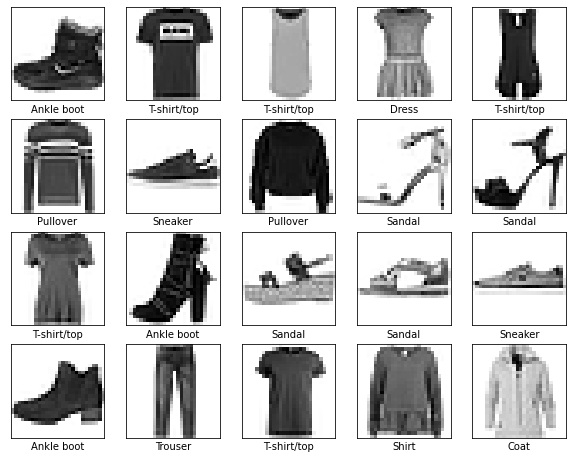

In [7]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(Labels[train_labels[i]])
plt.show()

In [8]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [9]:
#MODEL CODE
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(layers.BatchNormalization(center = True, scale = False))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (2, 2), activation='relu', padding='same')) 
model.add(layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(layers.BatchNormalization(center = True, scale = False))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
model.add(layers.BatchNormalization(center = True, scale = False))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization(center = True, scale = False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6486 - accuracy: 0.7697 - val_loss: 0.4364 - val_accuracy: 0.8431
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3181 - accuracy: 0.8851 - val_loss: 0.2892 - val_accuracy: 0.8915
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2792 - accuracy: 0.8992 - val_loss: 0.2312 - val_accuracy: 0.9148
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2485 - accuracy: 0.9096 - val_loss: 0.2571 - val_accuracy: 0.9089
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2286 - accuracy: 0.9177 - val_loss: 0.2464 - val_accuracy: 0.9087
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2055 - accuracy: 0.9267 - val_loss: 0.3283 - val_accuracy: 0.8891
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1995 - accuracy: 0.9288 - val_loss: 0.2036 - val_ac

313/313 - 1s - loss: 0.1941 - accuracy: 0.9318


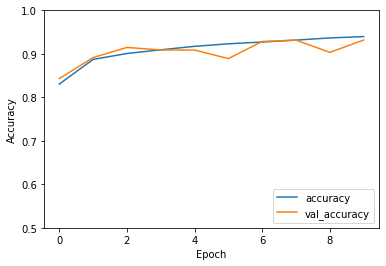

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [12]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9318000078201294


In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

(60000, 28, 28)
(60000,)
[9 0 0]


In [14]:
# Initialize the image classifier.
clf = ak.ImageClassifier(overwrite=True, max_trials=2)
# Feed the image classifier with training data.
clf.fit(x_train, y_train, epochs=10)
# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y)
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

Trial 2 Complete [00h 43m 43s]
val_loss: 0.27929845452308655

Best val_loss So Far: 0.2246738076210022
Total elapsed time: 00h 44m 46s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5527 - accuracy: 0.8021
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3258 - accuracy: 0.8831
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2812 - accuracy: 0.8982
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2587 - accuracy: 0.9063
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2433 - accuracy: 0.9117
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2271 - accuracy: 0.9176
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2206 - accuracy: 0.9172
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2111 - accuracy: 0.9211
Epoch 9/10


313/313 - 1s - loss: 0.2346 - accuracy: 0.9184


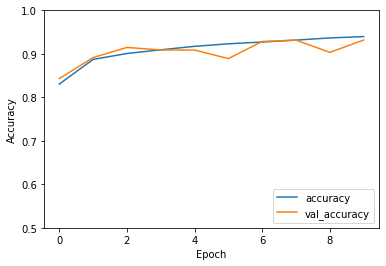

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = clf.evaluate(x_test,  y_test, verbose=2)

In [16]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.91839998960495


In [17]:
model = clf.export_model()

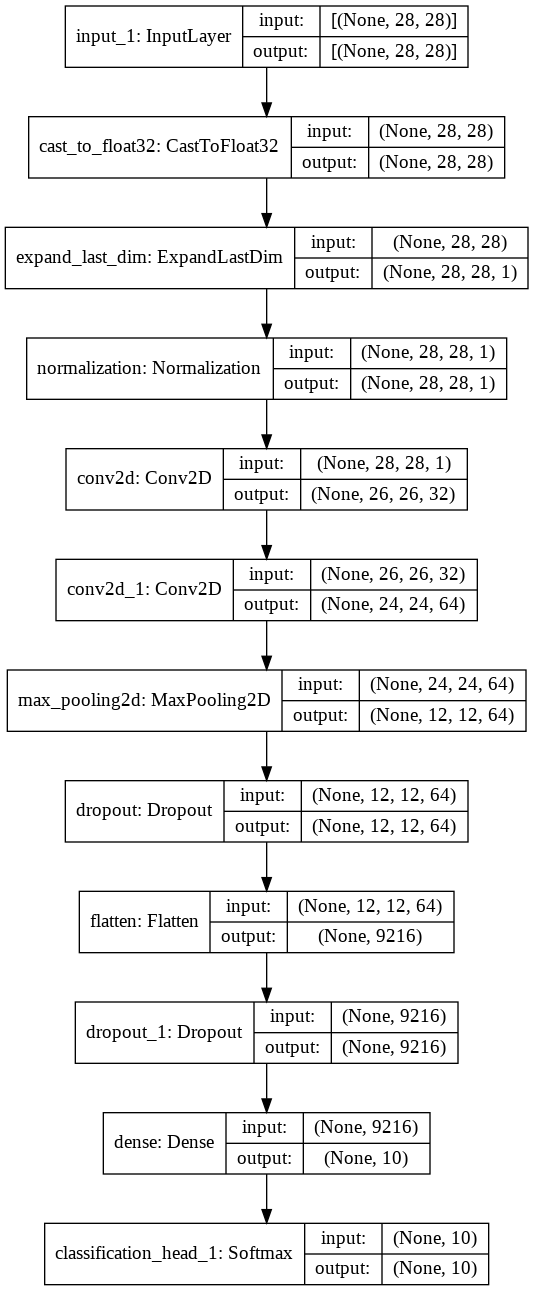

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)